In [142]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
df = pd.read_csv("Feature_engin_treated.csv")

### Rapport profiling des features enginered

In [130]:

# Charger le dataset
df = pd.read_csv('Feature_engin_treated.csv')

# Générer le rapport de profiling
report = ProfileReport(df)

# Sauvegarder le rapport au format HTML
report.to_file('rapport_engin.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Methode du coude

In [143]:
df_cleansed = df.dropna()
df_cleansed.isna().sum()

Customer ID      0
AverageAmount    0
TotalAmount      0
TimeDiff         0
R                0
F                0
M                0
dtype: int64

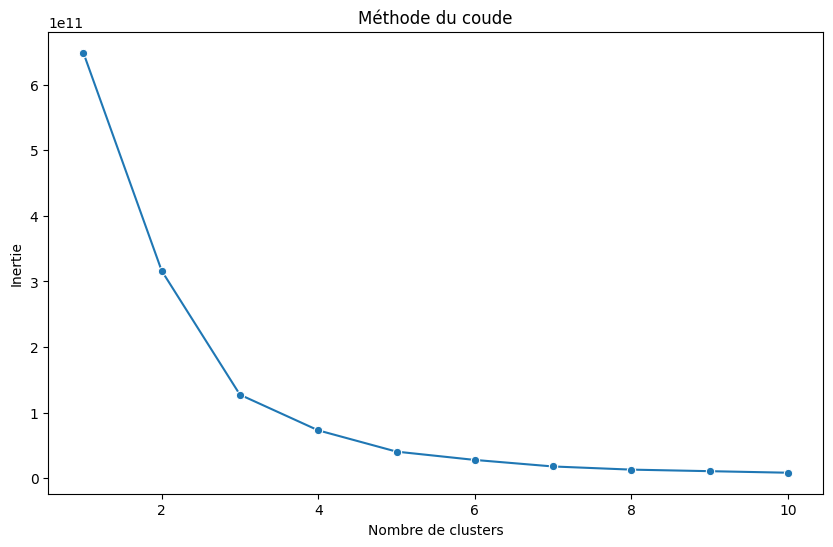

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

columns = ['AverageAmount', 'TotalAmount', 'TimeDiff', 'R', 'F', 'M']
data = df_cleansed[columns]

inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


### Clustering

In [145]:
df_cleansed = df.dropna()
df_cleansed.isna().sum()

Customer ID      0
AverageAmount    0
TotalAmount      0
TimeDiff         0
R                0
F                0
M                0
dtype: int64

In [146]:

# Sélectionner les colonnes à utiliser pour le clustering
columns = ['AverageAmount', 'TotalAmount', 'TimeDiff', 'R', 'F', 'M']
data = df_cleansed[columns]

# Créer le pipeline de standardisation et clustering
pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=4, max_iter=100,random_state=42))

# Effectuer le clustering
pipeline.fit(data)

# Obtenir les labels de cluster pour chaque échantillon
labels = pipeline.predict(data)

# Ajouter les labels de cluster au DataFrame
df_cleansed['Cluster'] = labels






/tmp/ipykernel_7130/1161156539.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['Cluster'] = labels


In [147]:
df_try = df_cleansed
# Supprimer les lignes avec les valeurs spécifiques dans la colonne "TimeDiff"
df_try = df_try.drop(df_try[(df_try['Customer ID'] == 12918) | (df_try['Customer ID'] == 17013)].index)

# Réinitialiser les indices du DataFrame
df_try = df_try.reset_index(drop=True)


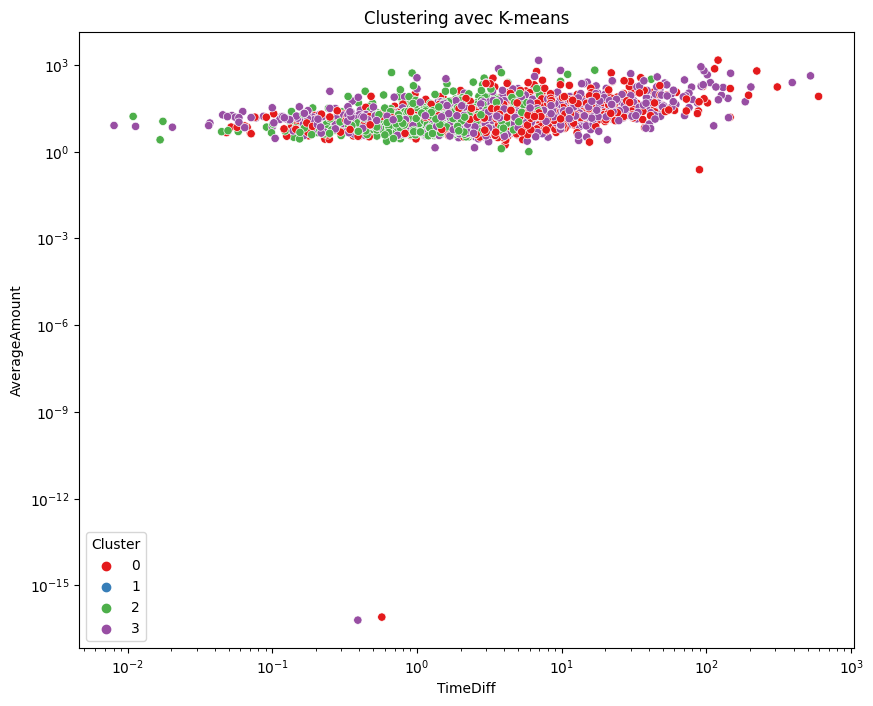

In [148]:

# Charger le dataset
df = df_try

# Sélectionner les colonnes à utiliser pour le clustering (R, F, M)
X = df[['R', 'F', 'M']]

# Créer une pipeline avec une étape de mise à l'échelle robuste
pipeline = Pipeline([
    ('scaler', RobustScaler())
])

# Appliquer la transformation de mise à l'échelle robuste sur les colonnes numériques
X_scaled = pipeline.fit_transform(X)

# Définir le nombre de clusters
num_clusters = 4

# Créer une instance du modèle K-means avec une initialisation K-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

# Effectuer le clustering
kmeans.fit(X_scaled)

# Obtenir les labels de clusters assignés à chaque échantillon
labels = kmeans.labels_

# Ajouter les labels de clusters au DataFrame
df['Cluster'] = labels

# Visualiser les clusters en utilisant un diagramme en nuage de points
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='TimeDiff', y='AverageAmount', hue='Cluster', palette='Set1')
plt.xlabel('TimeDiff')
plt.ylabel('AverageAmount')
plt.title('Clustering avec K-means')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Cluster')
plt.show()



In [151]:
df.to_csv('Cluster_set.csv',index=False)

In [152]:
import pandas as pd

# Supprimer la limite d'affichage de colonnes
pd.set_option('display.max_columns', None)

# Effectuer un groupby sur la colonne "Cluster"
df_grouped = df.groupby('Cluster').describe()

# Afficher le DataFrame résultant
display(df_grouped)



Customer ID                                                         \
              count          mean          std      min       25%      50%   
Cluster                                                                      
0            1279.0  15532.569977  1586.859176  12820.0  14140.50  15568.0   
1            1198.0  15625.758765  1608.459481  12608.0  14280.25  15599.5   
2            1238.0  15536.830372  1538.023823  12346.0  14255.25  15550.5   
3            1555.0  15557.434084  1586.491898  12745.0  14155.50  15565.0   

                           AverageAmount                                \
              75%      max         count       mean        std     min   
Cluster                                                                  
0        16912.00  18287.0        1279.0  29.414316  72.236858   -1.22   
1        17085.00  18285.0        1198.0  20.380529  33.533436  -33.75   
2        16854.25  18283.0        1238.0  19.301169  46.343366 -360.40   
3        16910.00  18286.0        1555.0  27.986685  65.239223  -70.48   

                                                      TotalAmount  \
               25%        50%        75%          max       count   
Cluster                                                             
0        12.865461  17.063478  24.906468  1459.440000      1279.0   
1         8.535000  15.506476  20.233833   679.823750      1198.0   
2         7.777702  14.878538  19.743947   655.454146      1238.0   
3        11.334816  16.334103  22.573264  1435.726667      1555.0   

                                                                             \
                mean           std      min        25%       50%        75%   
Cluster                                                                       
0        1700.971097   3069.008913    -6.10   631.1100  1064.770  1881.7400   
1         299.566253    515.815224  -658.63   135.3925   214.755   348.4825   
2        7705.751557  21788.347752 -3767.20  2222.7725  3841.640  6875.8925   
3         936.574151   1772.356330  -242.70   353.3800   640.130  1100.3450   

                   TimeDiff                                                \
               max    count      mean        std  min       25%       50%   
Cluster                                                                     
0         72727.41   1279.0  9.191529  23.880944  0.0  2.474937  4.720588   
1         11880.84   1198.0  0.000000   0.000000  0.0  0.000000  0.000000   
2        570380.61   1238.0  2.150117   2.162665  0.0  1.031749  1.762983   
3         54558.18   1555.0  9.160106  23.085056  0.0  1.661692  4.036364   

                                  R                                          \
              75%       max   count      mean       std       min       25%   
Cluster                                                                       
0        8.809047  596.0000  1279.0  0.858540  0.569992  0.000000  0.333333   
1        0.000000    0.0000  1198.0  2.540619  0.816365  0.000000  2.247222   
2        2.719924   41.5625  1238.0  1.042587  0.961599  0.000000  0.233333   
3        8.721966  524.0000  1555.0  2.824023  0.369798  1.216667  2.927778   

                                            F                           \
              50%       75%       max   count      mean       std  min   
Cluster                                                                  
0        0.800000  1.308333  2.322222  1279.0  2.684389  0.380400  2.0   
1        3.000000  3.000000  3.000000  1198.0  1.000000  0.000000  1.0   
2        0.766667  1.566667  3.000000  1238.0  2.981152  0.102970  2.0   
3        3.000000  3.000000  3.000000  1555.0  2.428725  0.407955  2.0   

                                            M                              \
              25%       50%  75%  max   count      mean       std     min   
Cluster                                                                     
0        2.333333  3.000000  3.0  3.0  1279.0  1.205603  0.4

In [153]:
df_grouped

Customer ID                                                         \
              count          mean          std      min       25%      50%   
Cluster                                                                      
0            1279.0  15532.569977  1586.859176  12820.0  14140.50  15568.0   
1            1198.0  15625.758765  1608.459481  12608.0  14280.25  15599.5   
2            1238.0  15536.830372  1538.023823  12346.0  14255.25  15550.5   
3            1555.0  15557.434084  1586.491898  12745.0  14155.50  15565.0   

                           AverageAmount                                \
              75%      max         count       mean        std     min   
Cluster                                                                  
0        16912.00  18287.0        1279.0  29.414316  72.236858   -1.22   
1        17085.00  18285.0        1198.0  20.380529  33.533436  -33.75   
2        16854.25  18283.0        1238.0  19.301169  46.343366 -360.40   
3        16910.00  18286.0        1555.0  27.986685  65.239223  -70.48   

                                                      TotalAmount  \
               25%        50%        75%          max       count   
Cluster                                                             
0        12.865461  17.063478  24.906468  1459.440000      1279.0   
1         8.535000  15.506476  20.233833   679.823750      1198.0   
2         7.777702  14.878538  19.743947   655.454146      1238.0   
3        11.334816  16.334103  22.573264  1435.726667      1555.0   

                                                                             \
                mean           std      min        25%       50%        75%   
Cluster                                                                       
0        1700.971097   3069.008913    -6.10   631.1100  1064.770  1881.7400   
1         299.566253    515.815224  -658.63   135.3925   214.755   348.4825   
2        7705.751557  21788.347752 -3767.20  2222.7725  3841.640  6875.8925   
3         936.574151   1772.356330  -242.70   353.3800   640.130  1100.3450   

                   TimeDiff                                                \
               max    count      mean        std  min       25%       50%   
Cluster                                                                     
0         72727.41   1279.0  9.191529  23.880944  0.0  2.474937  4.720588   
1         11880.84   1198.0  0.000000   0.000000  0.0  0.000000  0.000000   
2        570380.61   1238.0  2.150117   2.162665  0.0  1.031749  1.762983   
3         54558.18   1555.0  9.160106  23.085056  0.0  1.661692  4.036364   

                                  R                                          \
              75%       max   count      mean       std       min       25%   
Cluster                                                                       
0        8.809047  596.0000  1279.0  0.858540  0.569992  0.000000  0.333333   
1        0.000000    0.0000  1198.0  2.540619  0.816365  0.000000  2.247222   
2        2.719924   41.5625  1238.0  1.042587  0.961599  0.000000  0.233333   
3        8.721966  524.0000  1555.0  2.824023  0.369798  1.216667  2.927778   

                                            F                           \
              50%       75%       max   count      mean       std  min   
Cluster                                                                  
0        0.800000  1.308333  2.322222  1279.0  2.684389  0.380400  2.0   
1        3.000000  3.000000  3.000000  1198.0  1.000000  0.000000  1.0   
2        0.766667  1.566667  3.000000  1238.0  2.981152  0.102970  2.0   
3        3.000000  3.000000  3.000000  1555.0  2.428725  0.407955  2.0   

                                            M                              \
              25%       50%  75%  max   count      mean       std     min   
Cluster                                                                     
0        2.333333  3.000000  3.0  3.0  1279.0  1.205603  0.4

In [154]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



df_pca = df_cleansed
# Sélectionner les colonnes pertinentes pour l'ACP
features = ['R','F', 'M']

# Standardisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca[features])

# Création de la matrice de corrélation
corr_matrix = pd.DataFrame(df_scaled, columns=features).corr()

# Calcul des composantes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Créer un DataFrame pour stocker les résultats de l'ACP
df_test = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Afficher les premières lignes du DataFrame résultant
df_test

,PC1,PC2
0,0.587100,-1.524276
1,-2.274140,0.188555
2,-1.209046,-0.458514
3,-0.910549,-0.641826
4,2.548123,0.388389
...,...,...
5267,2.517775,0.337551
5268,-0.954663,-0.604206
5269,-1.751787,-0.110609
5270,-0.362241,-0.955855


/tmp/ipykernel_7130/2076496609.py:36: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  centroids = df.groupby('Cluster')['PC1', 'PC2'].mean().reset_index()


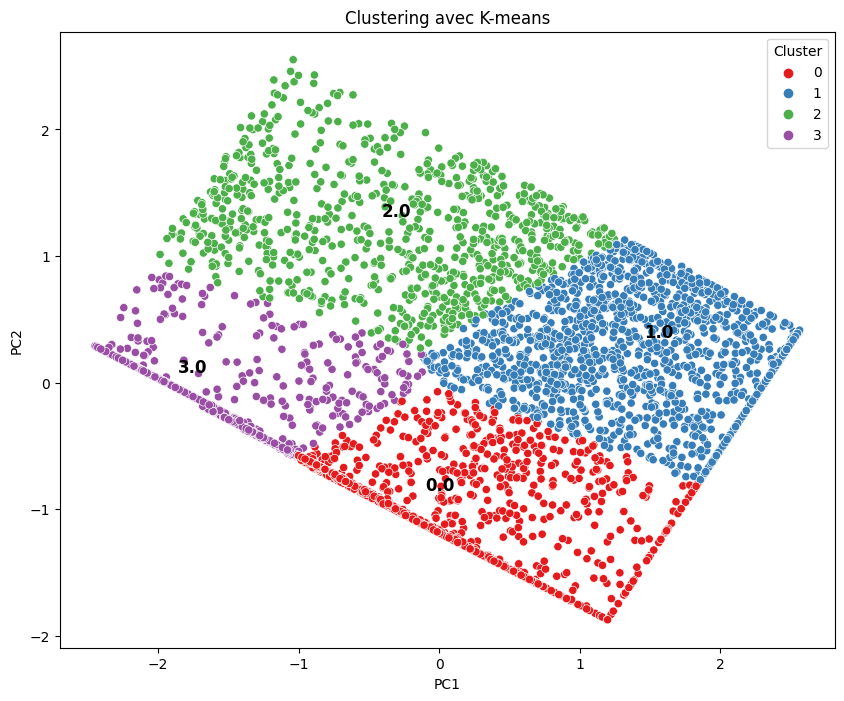

In [155]:

# Charger le dataset
df = df_test

# Sélectionner les colonnes à utiliser pour le clustering (R, F, M)
X = df[['PC1', 'PC2']]

# Appliquer la transformation de mise à l'échelle avec StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Définir le nombre de clusters
num_clusters = 4

# Créer une instance du modèle K-means avec une initialisation K-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

# Effectuer le clustering
kmeans.fit(X_scaled)

# Obtenir les labels de clusters assignés à chaque échantillon
labels = kmeans.labels_

# Ajouter les labels de clusters au DataFrame
df['Cluster'] = labels

# Visualiser les clusters en utilisant un diagramme en nuage de points

# Visualiser les clusters en utilisant un diagramme en nuage de points avec Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering avec K-means')

# Calculer les centroïdes de chaque cluster
centroids = df.groupby('Cluster')['PC1', 'PC2'].mean().reset_index()

# Ajouter des annotations aux ensembles de points
for i, row in centroids.iterrows():
    plt.annotate(row['Cluster'], (row['PC1'], row['PC2']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, fontweight='bold')

plt.show()

